# Deep Learning
## HW3

---

Name: <font face="Times" size=4 color=orange> Hamidreza Amirzadeh
<font face="Times" size=3 color=black>
    
S.No.: <font face="Times" size=4 color=orange> 401206999

---

## 1. *Import libraries*

In [230]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

## 2. *Load data*

In [231]:
data_csv = pd.read_csv("Data.csv")
data_csv.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [232]:
data_csv.shape

(144, 2)

In [233]:
data_csv['Date'] = pd.to_datetime(data_csv['Month'])

In [234]:
data_csv.head()

,Month,Passengers,Date
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01


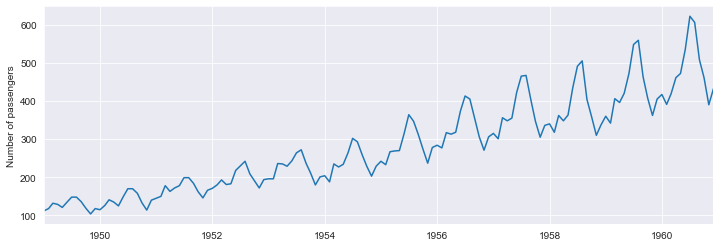

In [235]:
plt.figure(figsize=(12,4))
plt.ylabel('Number of passengers')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(data_csv['Date'], data_csv['Passengers'])
plt.show()

In [236]:
# data_csv = pd.read_csv("/content/Data.csv")
data = data_csv.iloc[:,1:2]
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

## 3. *Training and test data*

In [256]:
x, y = [], []
seq_len = 4
for i in range(len(data)-seq_len-1):
  x.append(np.array(data[i:(i+seq_len)]))
  y.append(np.array(data[i+seq_len]))

train_size = int(len(x) * 0.8)

####################
# YOUR CODE
x_train = torch.FloatTensor(x[:train_size])
y_train = torch.FloatTensor(y[:train_size])

x_test = torch.FloatTensor(x[train_size:])
y_test = torch.FloatTensor(y[train_size:])
####################

## 4. *Build the structure of models*

In [257]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        ####################
        # YOUR CODE
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        self.linear = nn.Linear(hidden_size, output_size)
        ####################

    def forward(self, x):
        ####################
        # YOUR CODE 
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        output, (h_n, c_n) = self.lstm(x, (h_0, c_0))
        h_n = h_n.view(-1, self.hidden_size)
        out = self.linear(h_n)
        return out
        ####################

class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU, self).__init__()
        ####################
        # YOUR CODE
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)

        self.linear = nn.Linear(hidden_size, output_size)
        ####################

    def forward(self, x):
        ####################
        # YOUR CODE
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        output, h_n = self.gru(x, h_0)
        h_n = h_n.view(-1, self.hidden_size)
        out = self.linear(h_n)
        return out
        ####################


## 5. *Train and test the models*






In [258]:
input_size = 1
hidden_size = 2
num_layers = 1
output_size = 1

num_epochs = 500
learning_rate = 1e-2
 
####################
# YOUR CODE
lstm = LSTM(input_size, hidden_size, num_layers, output_size)
gru = GRU(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
lstm_optimizer = torch.optim.Adam(lstm.parameters(), learning_rate)
gru_optimizer = torch.optim.Adam(gru.parameters(), learning_rate)
####################

def train_test(model, criterion, optimizer, x_train, y_train, num_epochs, learning_rate):
    epochs = np.zeros(num_epochs)
    train_losses = np.zeros(num_epochs)
    test_losses = np.zeros(num_epochs)
    
    for epoch in range(num_epochs):
        epochs[epoch] = epoch
        # Train the model
        ####################
        # YOUR CODE
        model.train()
        
        preds = model(x_train)
        
        optimizer.zero_grad()
        loss = criterion(preds, y_train)
        train_losses[epoch] += loss.item()
        loss.backward()
        optimizer.step()
        ####################
        
        # Test the model
        ####################
        # YOUR CODE
        model.eval()

        with torch.no_grad():
            preds = model(x_test)
            loss = criterion(preds, y_test)
            test_losses[epoch] += loss.item()
        ####################

        train_loss = train_losses[epoch]
        test_loss = test_losses[epoch]
        print('Epoch: {0} , Train_loss: {1:.5f} , Test_loss: {2:.5f}'.format(epoch+1, train_loss, test_loss))

    return epochs, train_losses, test_losses

In [259]:
lstm_epochs, lstm_train_losses, lstm_test_losses = train_test(lstm, criterion, lstm_optimizer, x_train, y_train, num_epochs, learning_rate)

Epoch: 1 , Train_loss: 0.03778 , Test_loss: 0.22413
Epoch: 2 , Train_loss: 0.03462 , Test_loss: 0.20698
Epoch: 3 , Train_loss: 0.03248 , Test_loss: 0.19168
Epoch: 4 , Train_loss: 0.03124 , Test_loss: 0.17840
Epoch: 5 , Train_loss: 0.03074 , Test_loss: 0.16735
Epoch: 6 , Train_loss: 0.03076 , Test_loss: 0.15873
Epoch: 7 , Train_loss: 0.03104 , Test_loss: 0.15262
Epoch: 8 , Train_loss: 0.03135 , Test_loss: 0.14887
Epoch: 9 , Train_loss: 0.03152 , Test_loss: 0.14719
Epoch: 10 , Train_loss: 0.03149 , Test_loss: 0.14721
Epoch: 11 , Train_loss: 0.03126 , Test_loss: 0.14858
Epoch: 12 , Train_loss: 0.03089 , Test_loss: 0.15097
Epoch: 13 , Train_loss: 0.03045 , Test_loss: 0.15406
Epoch: 14 , Train_loss: 0.03001 , Test_loss: 0.15756
Epoch: 15 , Train_loss: 0.02960 , Test_loss: 0.16115
Epoch: 16 , Train_loss: 0.02927 , Test_loss: 0.16451
Epoch: 17 , Train_loss: 0.02901 , Test_loss: 0.16732
Epoch: 18 , Train_loss: 0.02880 , Test_loss: 0.16925
Epoch: 19 , Train_loss: 0.02862 , Test_loss: 0.17002
Ep

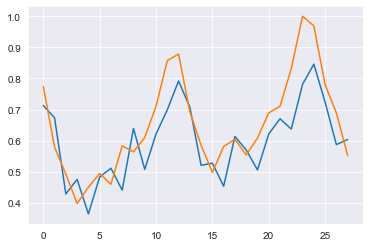

In [260]:
plt.plot(lstm(x_test).tolist())
plt.plot(y_test)

In [261]:
gru_epochs, gru_train_losses, gru_test_losses = train_test(gru, criterion, gru_optimizer, x_train, y_train, num_epochs, learning_rate)

Epoch: 1 , Train_loss: 0.10364 , Test_loss: 0.05190
Epoch: 2 , Train_loss: 0.08808 , Test_loss: 0.06509
Epoch: 3 , Train_loss: 0.07462 , Test_loss: 0.08064
Epoch: 4 , Train_loss: 0.06330 , Test_loss: 0.09831
Epoch: 5 , Train_loss: 0.05412 , Test_loss: 0.11773
Epoch: 6 , Train_loss: 0.04702 , Test_loss: 0.13837
Epoch: 7 , Train_loss: 0.04188 , Test_loss: 0.15953
Epoch: 8 , Train_loss: 0.03853 , Test_loss: 0.18031
Epoch: 9 , Train_loss: 0.03671 , Test_loss: 0.19973
Epoch: 10 , Train_loss: 0.03611 , Test_loss: 0.21678
Epoch: 11 , Train_loss: 0.03634 , Test_loss: 0.23058
Epoch: 12 , Train_loss: 0.03700 , Test_loss: 0.24064
Epoch: 13 , Train_loss: 0.03775 , Test_loss: 0.24688
Epoch: 14 , Train_loss: 0.03831 , Test_loss: 0.24955
Epoch: 15 , Train_loss: 0.03855 , Test_loss: 0.24908
Epoch: 16 , Train_loss: 0.03842 , Test_loss: 0.24598
Epoch: 17 , Train_loss: 0.03796 , Test_loss: 0.24080
Epoch: 18 , Train_loss: 0.03722 , Test_loss: 0.23405
Epoch: 19 , Train_loss: 0.03631 , Test_loss: 0.22621
Ep

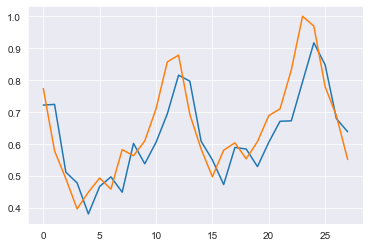

In [262]:
plt.plot(gru(x_test).tolist())
plt.plot(y_test)

## 6. *Compare LSTM and GRU loss*

[]

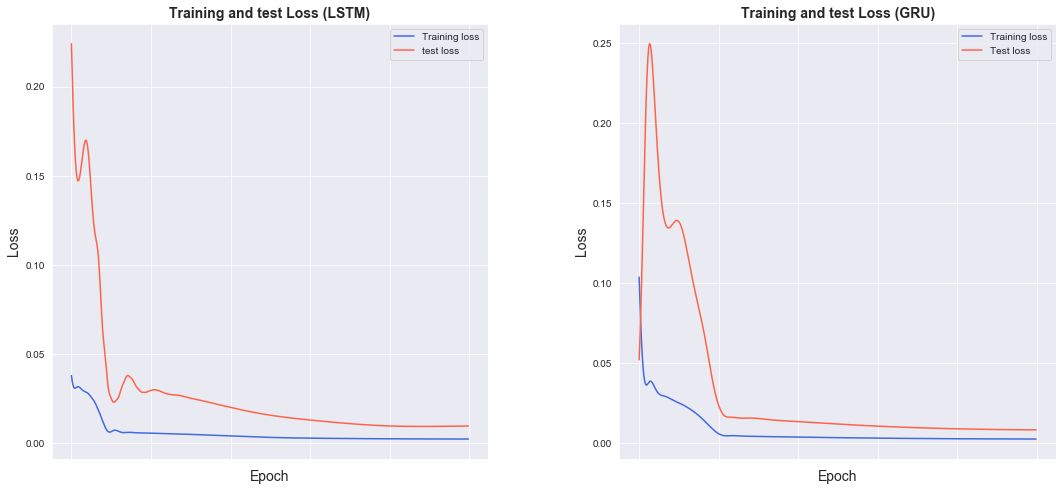

In [263]:
sns.set_style("darkgrid")    

fig = plt.figure(figsize=(18,8))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = lstm_epochs, y = lstm_train_losses, label="Training loss", color="royalblue")
ax = sns.lineplot(x = lstm_epochs, y = lstm_test_losses, label="test loss", color="tomato")
ax.set_title("Training and test Loss (LSTM)", size = 14, fontweight="bold")
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_xticklabels('', size=10)

plt.subplot(1, 2, 2)
ax = sns.lineplot(x = gru_epochs, y = gru_train_losses, label="Training loss", color="royalblue")
ax = sns.lineplot(x = gru_epochs, y = gru_test_losses, label="Test loss", color="tomato")
ax.set_title("Training and test Loss (GRU)", size = 14, fontweight="bold")
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_xticklabels('', size=10)

### 7. *Make predictions*

In [264]:
x_data = torch.Tensor(np.array(x))
y_data = torch.Tensor(np.array(y))

y_data = pd.DataFrame(scaler.inverse_transform(y_data.detach().numpy()))

lstm_data_predict = lstm(x_data).detach().numpy()
gru_data_predict = gru(x_data).detach().numpy()

lstm_data_predict = pd.DataFrame(scaler.inverse_transform(lstm_data_predict))
gru_data_predict = pd.DataFrame(scaler.inverse_transform(gru_data_predict))

## 8. *Compare LSTM and GRU prediction results*

[]

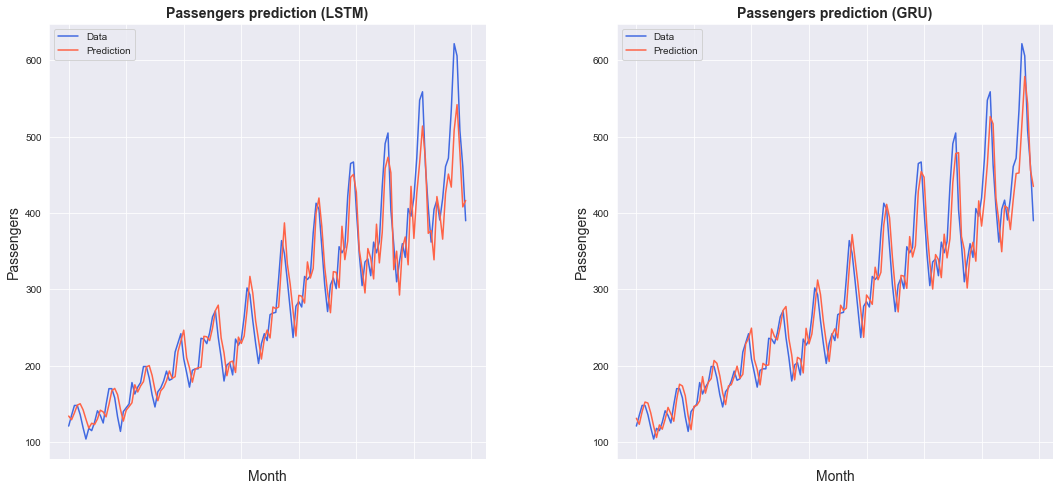

In [266]:
sns.set_style("darkgrid")    

fig = plt.figure(figsize=(18,8))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = y_data.index, y = y_data[0], label="Data", color="royalblue")
ax = sns.lineplot(x = lstm_data_predict.index, y = lstm_data_predict[0], label="Prediction", color="tomato")
ax.set_title("Passengers prediction (LSTM)", size = 14, fontweight="bold")
ax.set_xlabel("Month", size = 14)
ax.set_ylabel("Passengers", size = 14)
ax.set_xticklabels('', size=10)

plt.subplot(1, 2, 2)
ax = sns.lineplot(x = y_data.index, y = y_data[0], label="Data", color="royalblue")
ax = sns.lineplot(x = gru_data_predict.index, y = gru_data_predict[0], label="Prediction", color="tomato")
ax.set_title("Passengers prediction (GRU)", size = 14, fontweight="bold")
ax.set_xlabel("Month", size = 14)
ax.set_ylabel("Passengers", size = 14)
ax.set_xticklabels('', size=10)